#### Import Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import matplotlib.pyplot as plt

In [3]:
df_sales = pd.read_excel("sales data-set.xlsx")
df_stats = pd.read_excel("Features data set.xlsx")

# In an attemtpt to plot this, there were quite a few errors that had to do with format, let's check out the format of the entries in the dataframes and standardize

In [4]:
df_sales.info()
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   CPI           7605 non-null   float64
 5   Unemployment  7605 non-null   float64
 6   IsHoliday     8190 non-null   bool   
dtypes: bool(1), 

In [5]:
# Ideally, integers or floats should be used to plot, so it makes sense that the boolean format in the IsHoliday column and the object format in the Date columns would break it
# I want to think through how I ought to format the dates, and I'll exclude the holdiday stuff for now, perhaps only using it as a variable for comparative analysis, not to plot

df_sales['Date'] = pd.to_datetime(df_sales['Date'])
df_stats['Date'] = pd.to_datetime(df_stats['Date'])

# Running the above should have properly formatted these columns, let's check them

df_sales.info()
df_stats.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   CPI           7605 non-null   float64      

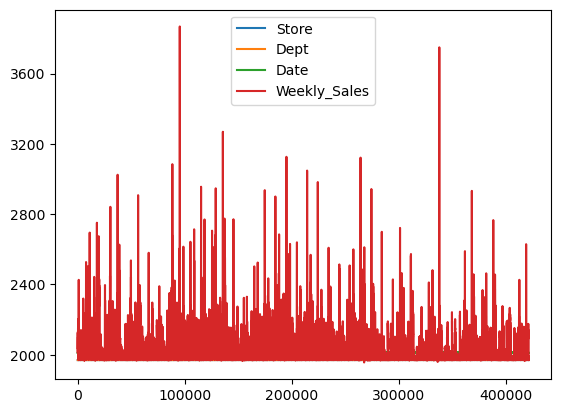

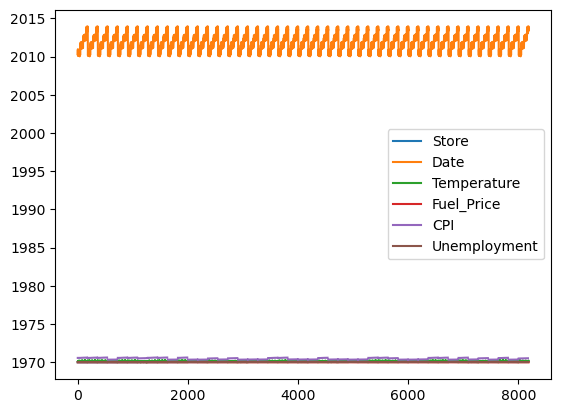

In [6]:
# Great!  That updated the format of the date columns, now let's try plotting the whole dataframes minus the IsHoliday columns

df_sales.iloc[:, df_sales.columns != 'IsHoliday'].plot()
plt.show()

df_stats.iloc[:, df_stats.columns != 'IsHoliday'].plot()
plt.show()

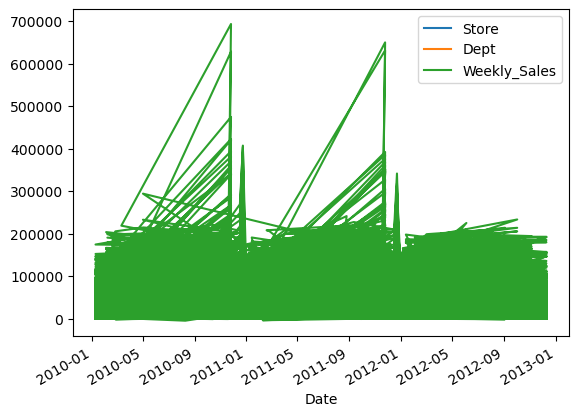

In [7]:
# Success!  We have graphs!  Although, they're not good ones, so we need to tweak stuff to get it where it needs to be.  But this is a good sign.
# We'll work first on the df_sales one and then move on

df_sales.plot(x = 'Date', kind = 'line')
plt.show()

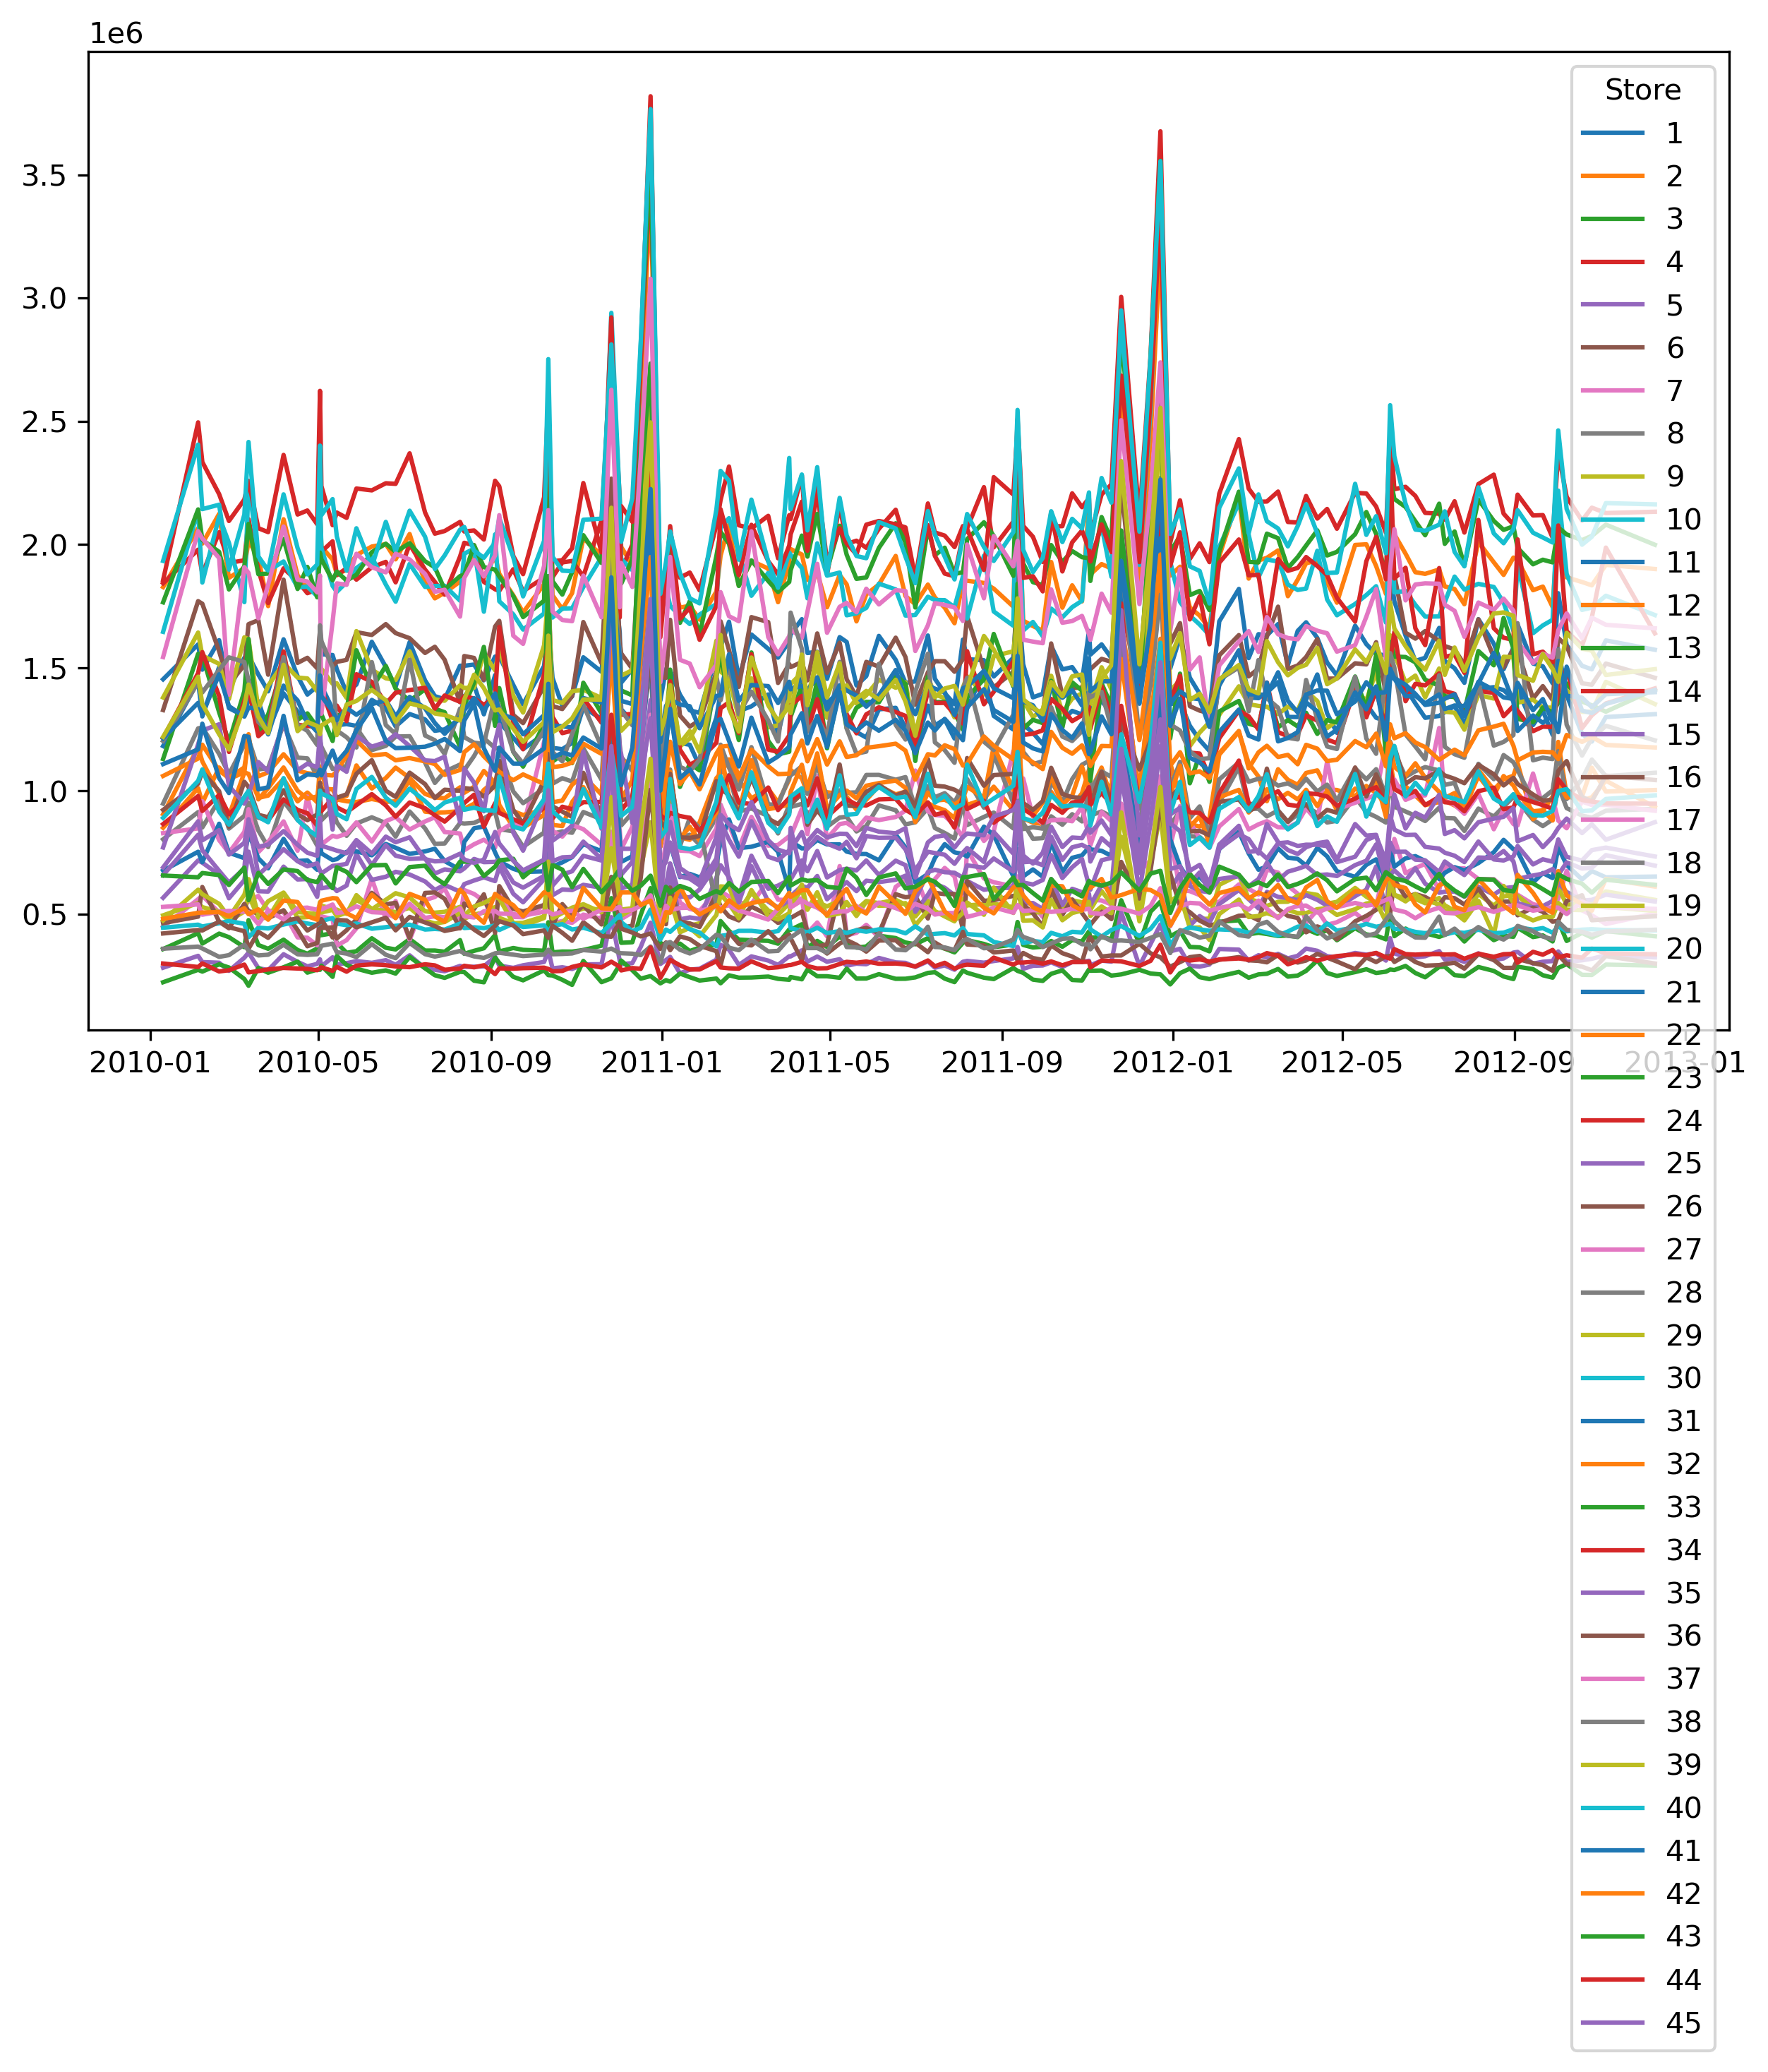

In [8]:
# Okay, excellent!  Now we've got a line graph mapping the sales across time.  However, obviously this is completely unreadable.  Need to think through how else we can do this.
# What would this look like if we had the x axis display each date entry?

# Going to then group up some of the columns and create a new df to try and plot
sales_grouped = df_sales.groupby(['Date', 'Store']) ['Weekly_Sales'].sum().unstack()

plt.figure(figsize=(10, 6), dpi= 300)    # Found this, it should increase the size of the figure itself
for Store in sales_grouped.columns:
    plt.plot(sales_grouped.index, sales_grouped[Store], label=Store)

plt.legend(title='Store')

plt.show()

In [9]:
# This is better, but still completely illegible.  
# It's at this time in a business environment I'd go back to the partner and get clarification on the purpose of the reporting.  
# There is always a way to break down unintelligible data into something that achieves the intended goal.
# In this case we'll simulate the top 5 and the bottom 5 stores' performance over time.

store_totals = df_sales.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)  # This creates a new dataframe that sorts all the stores by the sum of their sales

top_stores = store_totals.head(5).index.tolist()
bottom_stores = store_totals.tail(5).index.tolist()
# This set creates two new dataframes, pulls the index (which is the stores we want) and puts it into a Python list for later manipulation.


selected_stores = top_stores + bottom_stores 
filtered_stores = df_sales[df_sales['Store'].isin(selected_stores)]
# Concatonate the two new lists as a new dataframe and then filter.  The internal filter piece pulls compares the concatonated list we created against the original dataframe.
# The external df_sales[...] keeps the rows where the stores show up in the list in the internal part of the filter.

# This leaves us having to plot this new df.  We'll take the previous code plotting everything as an example to jump off from.


<Figure size 3000x1800 with 0 Axes>

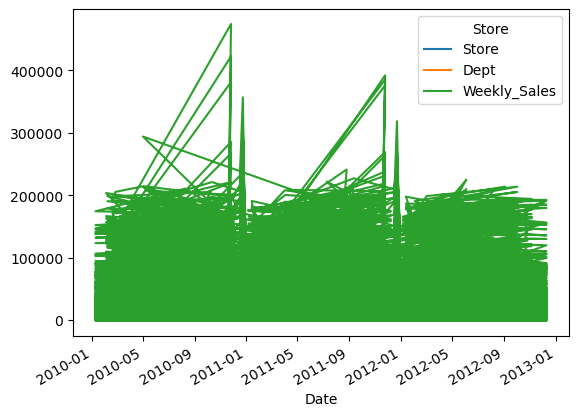

In [10]:
plt.figure(figsize=(10, 6), dpi= 300)
filtered_stores.plot(x = 'Date', kind = 'line')

plt.legend(title='Store')

plt.show()

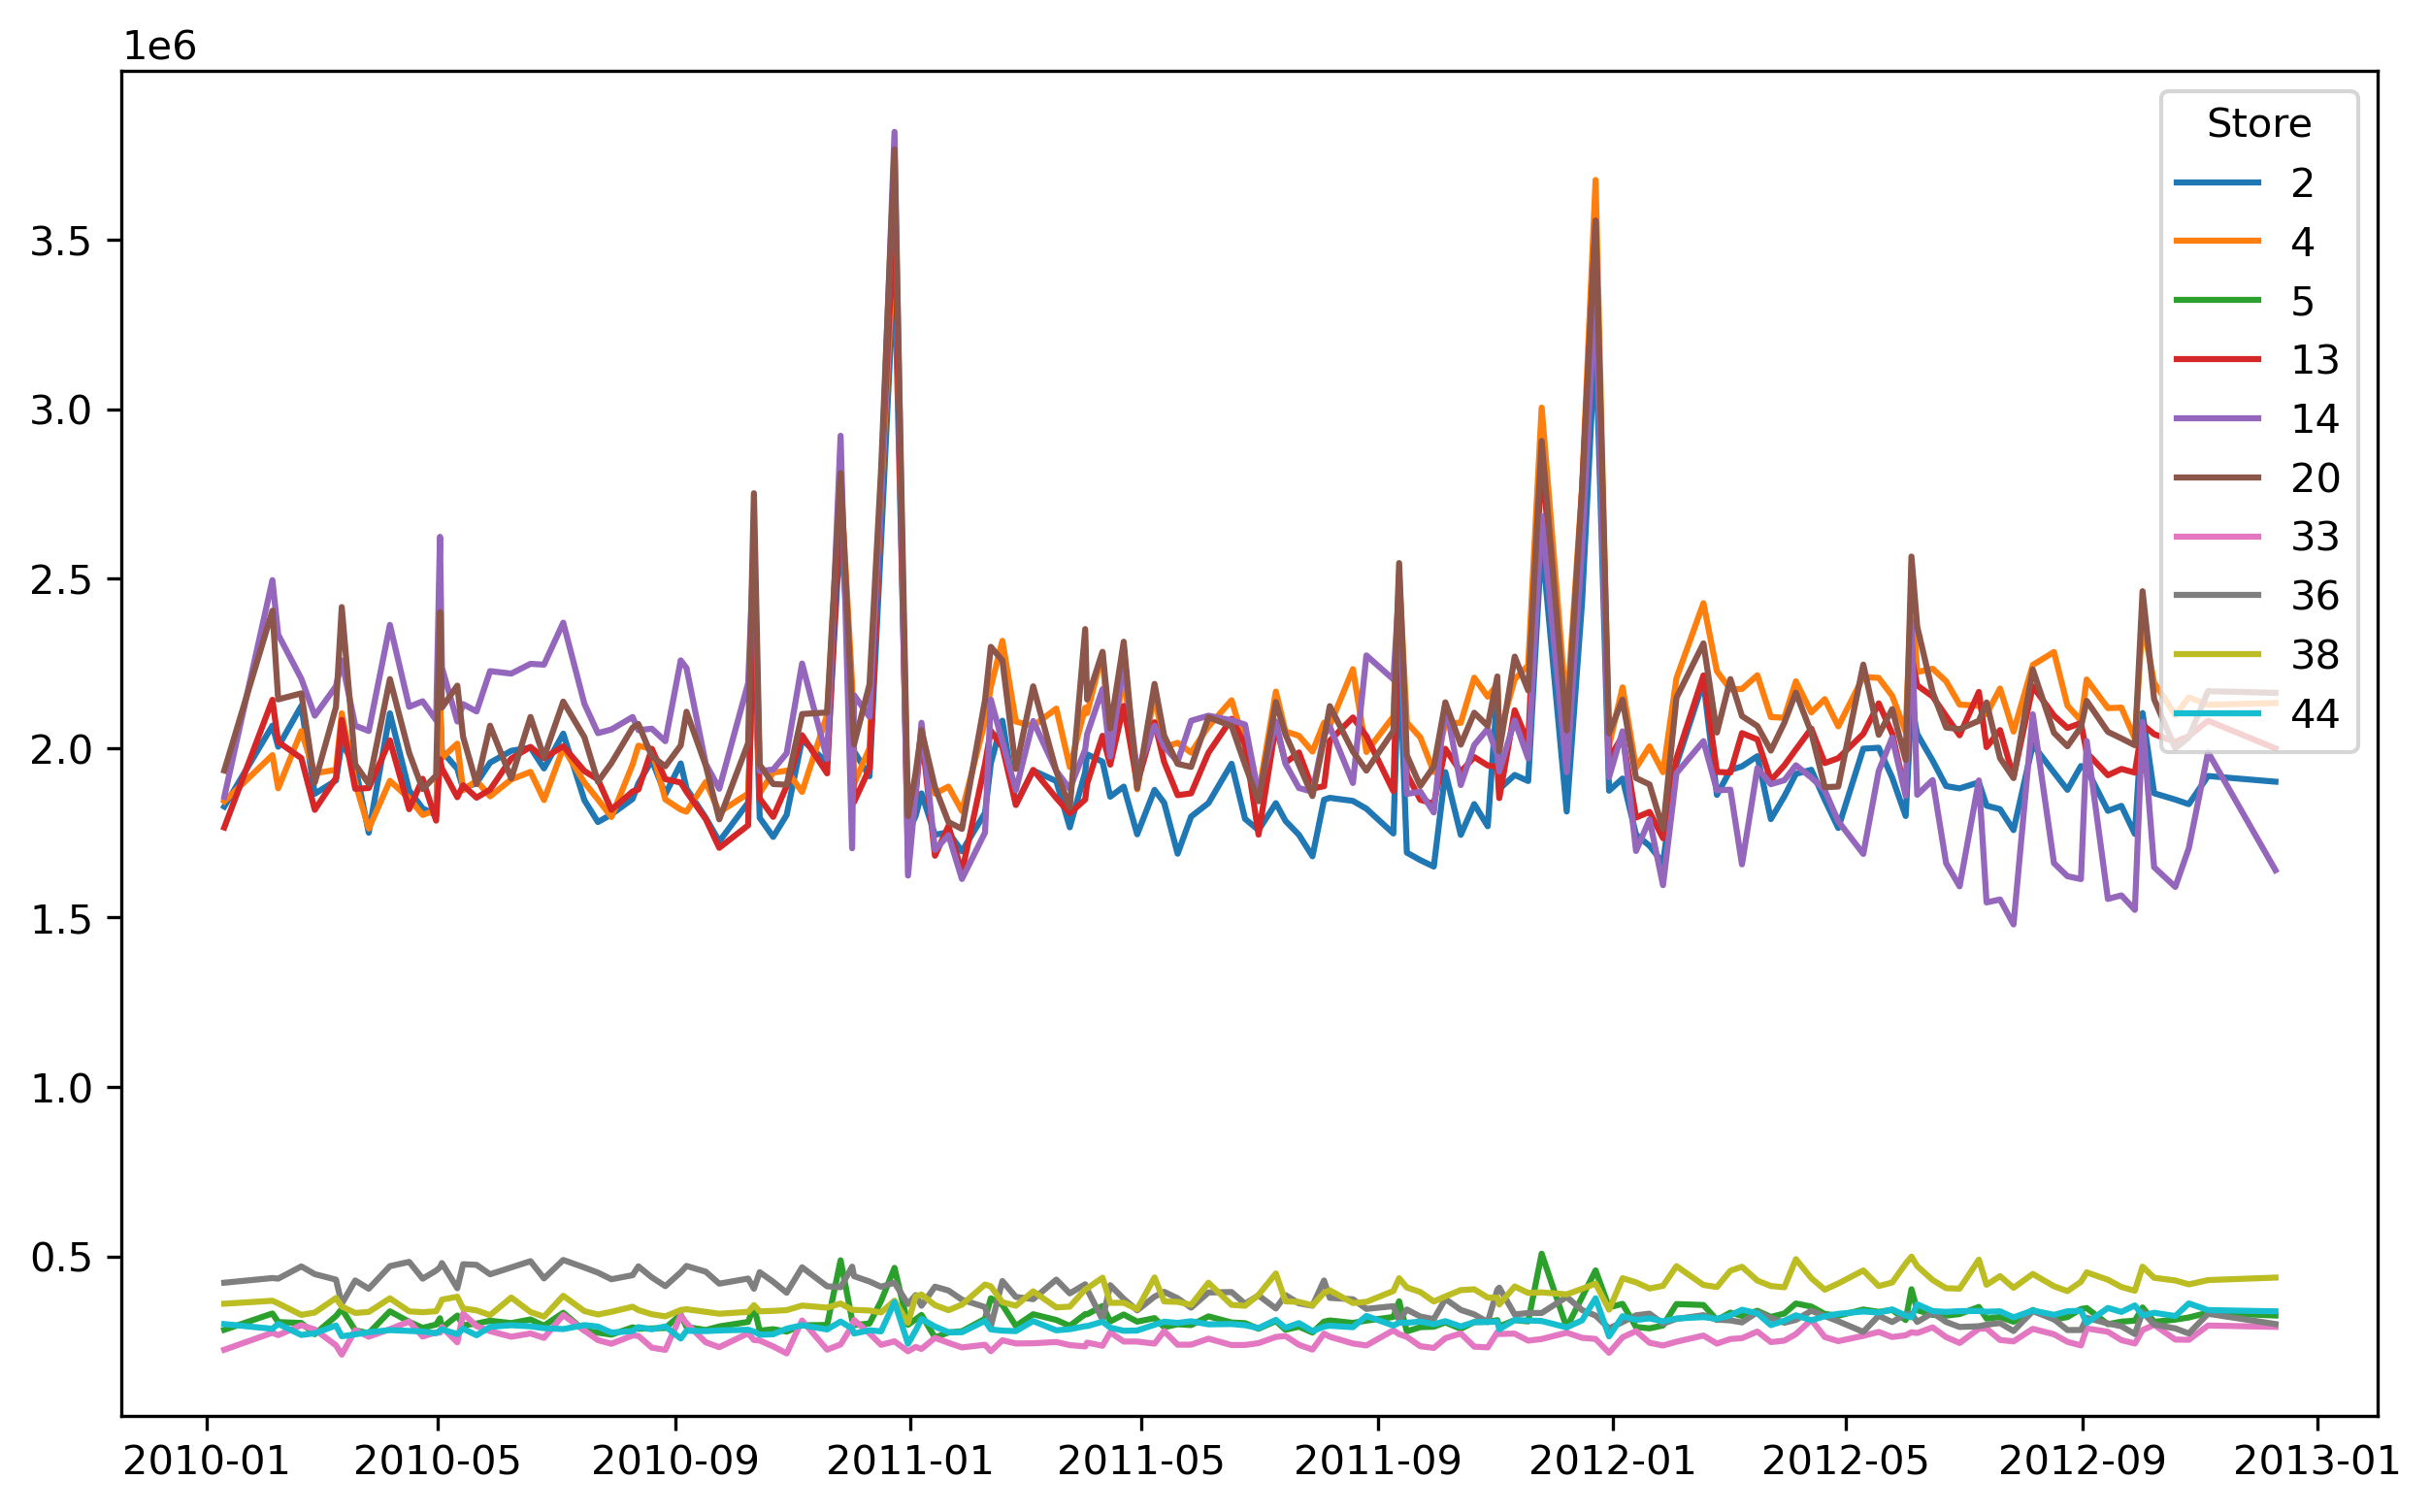

In [69]:
# Ah - and we are back where we started kind of.  Whoops!
# let's apply what we learned after trying to plot the initial df

new_grouped = filtered_stores.groupby(['Date', 'Store']) ['Weekly_Sales'].sum().unstack()

plt.figure(figsize=(10, 6), dpi= 300)    
for Store in new_grouped.columns:
    plt.plot(new_grouped.index, new_grouped[Store], label=Store)

plt.legend(title='Store')

plt.savefig("Sales.png", dpi=300)
plt.savefig("Sales.jpg", dpi=300)

plt.show()


In [12]:
# SUCCESS!
# Now let's see if we can pull similar stats from the other main dataframe that we defined initially.
# I'll start by making another df that doesn't include what we want to plot

df_stats_mod = df_stats.drop(df_stats.iloc[:, [0, 6]], axis=1)
df_stats_mod

,Date,Temperature,Fuel_Price,CPI,Unemployment
0,2010-05-02,42.31,2.572,211.096358,8.106
1,2010-12-02,38.51,2.548,211.242170,8.106
2,2010-02-19,39.93,2.514,211.289143,8.106
3,2010-02-26,46.63,2.561,211.319643,8.106
4,2010-05-03,46.50,2.625,211.350143,8.106
...,...,...,...,...,...
8185,2013-06-28,76.05,3.639,NaN,NaN
8186,2013-05-07,77.50,3.614,NaN,NaN
8187,2013-12-07,79.37,3.614,NaN,NaN
8188,2013-07-19,82.84,3.737,NaN,NaN


In [13]:
# Here we dropped stores and the Holiday data
# In general, we're going to just plot the general trends in Temp, Fuel Price, CPI, and Unemployment
# First, I should drop any duplicates that exist, being that this was originally broken out by store, these other factors should remain the same.

df_stats_unique = df_stats_mod.drop_duplicates(subset=['Date'], keep='first')
df_stats_unique


,Date,Temperature,Fuel_Price,CPI,Unemployment
0,2010-05-02,42.31,2.572,211.096358,8.106
1,2010-12-02,38.51,2.548,211.242170,8.106
2,2010-02-19,39.93,2.514,211.289143,8.106
3,2010-02-26,46.63,2.561,211.319643,8.106
4,2010-05-03,46.50,2.625,211.350143,8.106
...,...,...,...,...,...
177,2013-06-28,83.94,3.495,NaN,NaN
178,2013-05-07,79.85,3.422,NaN,NaN
179,2013-12-07,83.12,3.400,NaN,NaN
180,2013-07-19,79.26,3.556,NaN,NaN


Text(0.5, 1.0, 'Unemployment')

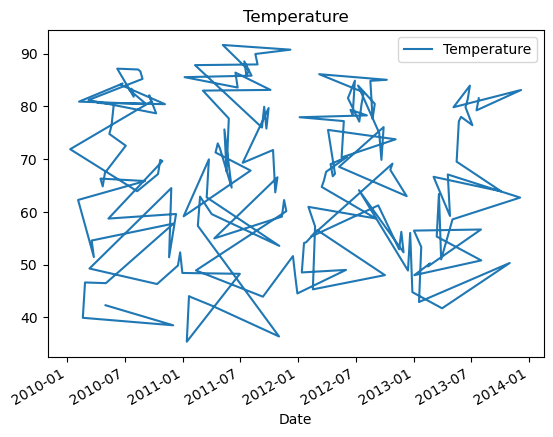

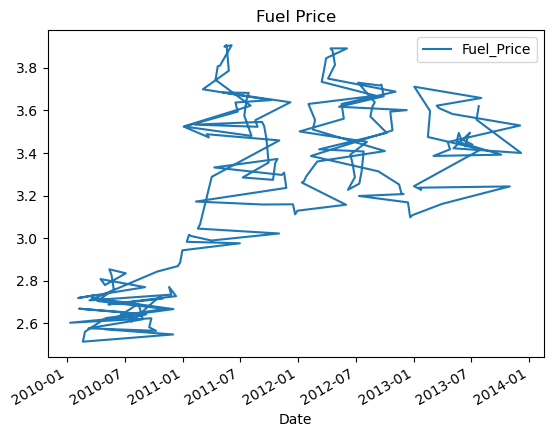

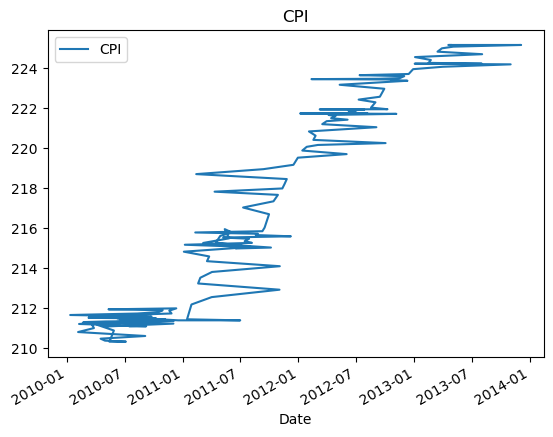

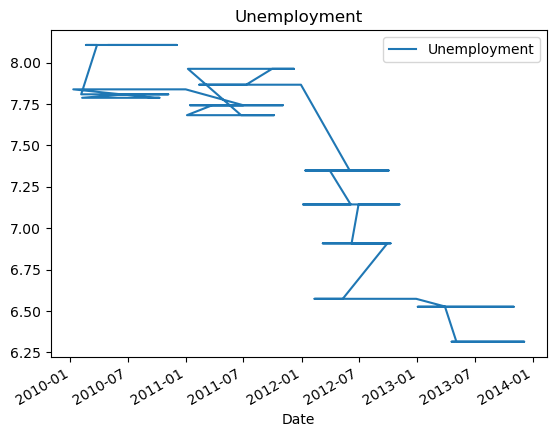

In [14]:
# Because these will be simpler, we can break the graphs up into simpler code

df_stats_unique.plot(x='Date', y='Temperature', kind='line')
plt.title('Temperature')
# Now, copy/paste three more time, modding for each

df_stats_unique.plot(x='Date', y='Fuel_Price', kind='line')
plt.title('Fuel Price')

df_stats_unique.plot(x='Date', y='CPI', kind='line')
plt.title('CPI')

df_stats_unique.plot(x='Date', y='Unemployment', kind='line')
plt.title('Unemployment')


<Figure size 10000x6000 with 0 Axes>

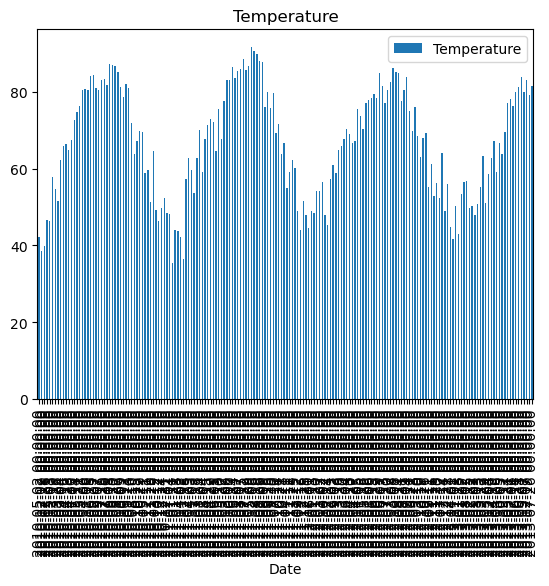

In [27]:
# Well, this isn't what you'd expect.  Something is up with our data, I think.  
# AH!  There's null values for various dates, that makes sense with what we see with all the crazy lines going straight horizontal.

plt.figure(figsize=(10,6), dpi=1000)
df_temp_unique = df_stats_unique[['Date', 'Temperature']].copy()   # Creating a new df that just is the two columns we want to plot
df_temp_unique.dropna()                                            # Drop those null values
df_temp_unique.plot(x='Date', y='Temperature', kind='bar')
plt.title('Temperature')
plt.show()


Text(0.5, 1.0, 'Fuel Price')

<Figure size 10000x6000 with 0 Axes>

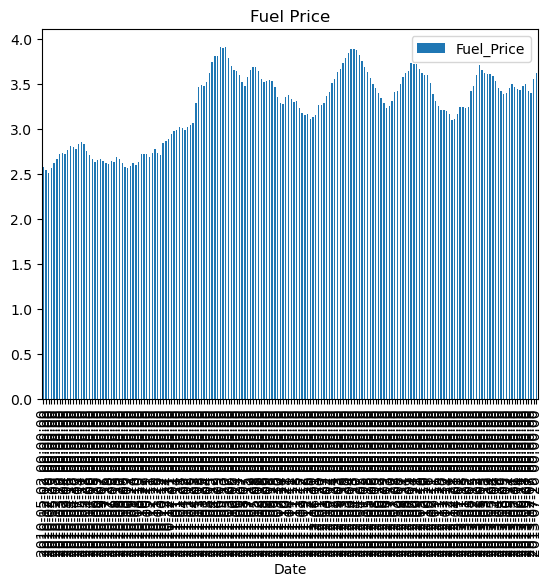

In [28]:
plt.figure(figsize=(10,6), dpi=1000)
df_fuel_unique = df_stats_unique[['Date', 'Fuel_Price']].copy()

df_fuel_unique.dropna()
df_fuel_unique.plot(x='Date', y='Fuel_Price', kind='bar')
plt.title('Fuel Price')


Text(0.5, 1.0, 'CPI')

<Figure size 10000x6000 with 0 Axes>

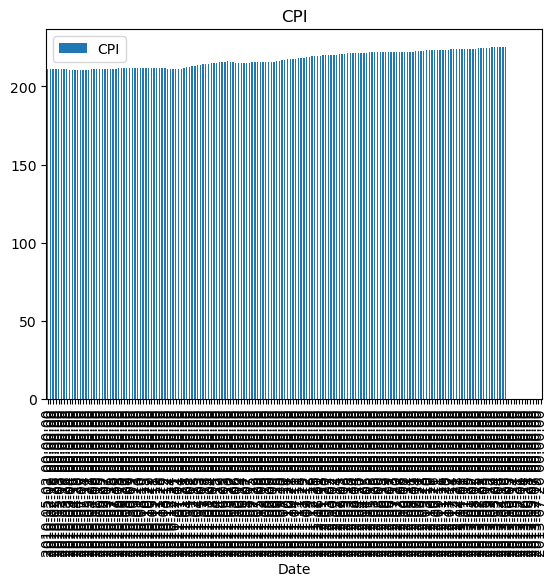

In [29]:
plt.figure(figsize=(10,6), dpi=1000)
df_cpi_unique = df_stats_unique[['Date', 'CPI']].copy()
df_cpi_unique.dropna()
df_cpi_unique.plot(x='Date', y='CPI', kind='bar')
plt.title('CPI')



Text(0.5, 1.0, 'Unemployment')

<Figure size 10000x6000 with 0 Axes>

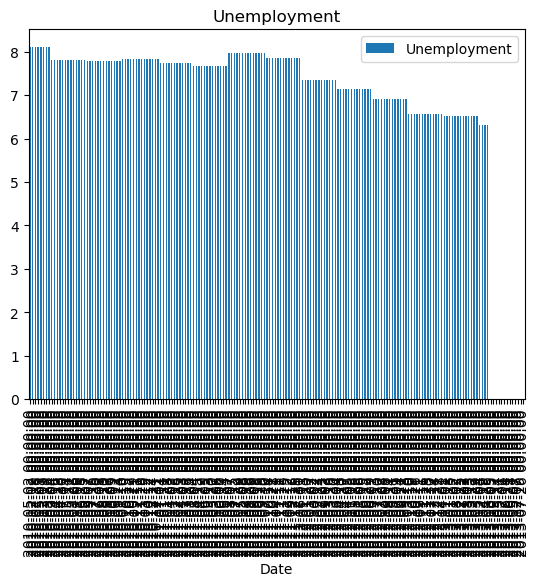

In [30]:
plt.figure(figsize=(10,6), dpi=1000)
df_unem_unique = df_stats_unique[['Date', 'Unemployment']].copy()
df_unem_unique.dropna()
df_unem_unique.plot(x='Date', y='Unemployment', kind='bar')
plt.title('Unemployment')



<Figure size 10000x6000 with 0 Axes>

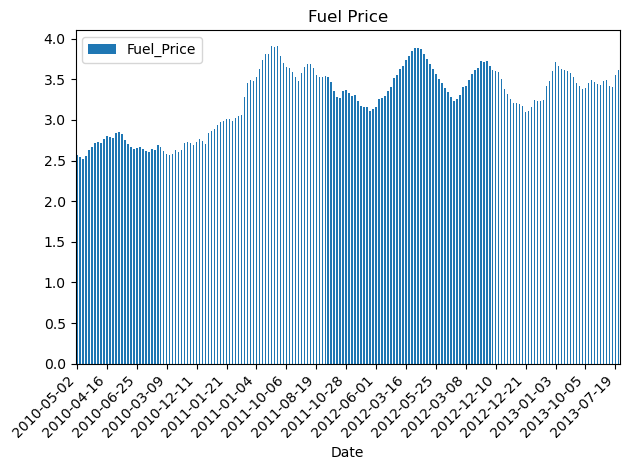

In [70]:
# These x axis ticks aren't legible, I'm going to try to make it so that only every x tick mark shows up so that we can better see the graph itself.


plt.figure(figsize=(10, 6), dpi=1000)
df_fuel_unique = df_stats_unique[['Date', 'Fuel_Price']].copy()
df_fuel_unique.dropna(inplace=True)  # use inplace=True to modify the df_fuel_unique dataframe
ax = df_fuel_unique.plot(x='Date', y='Fuel_Price', kind='bar')

plt.title('Fuel Price')

# Control x-axis label frequency
n = 10  # Show every 10th label (adjust as needed)

formatted_dates = [date.strftime('%Y-%m-%d') for date in df_fuel_unique['Date'].iloc[::n]]

plt.xticks(ticks=ax.get_xticks()[::n], labels=formatted_dates, rotation=45, ha='right')
plt.tight_layout()

plt.savefig("Fuel_Price.png", dpi=300)
plt.savefig("Fuel_Price.jpg", dpi=300)

plt.show()


<Figure size 10000x6000 with 0 Axes>

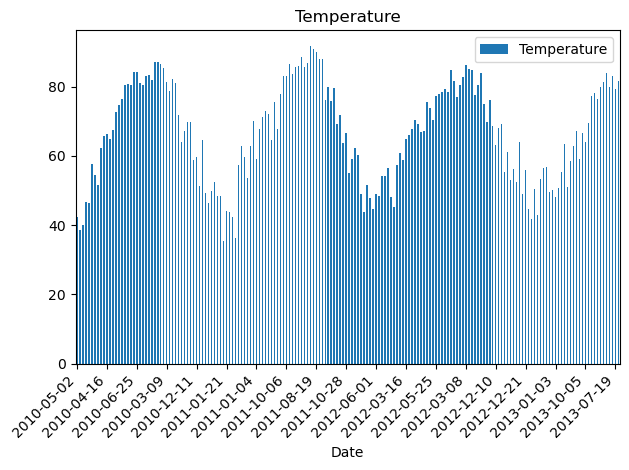

In [71]:
plt.figure(figsize=(10,6), dpi=1000)
df_temp_unique = df_stats_unique[['Date', 'Temperature']].copy()   
df_temp_unique.dropna()                                          
df_temp_unique.plot(x='Date', y='Temperature', kind='bar')
plt.title('Temperature')


n = 10  # Show every 10th label (adjust as needed)
# Get the labels directly from the dataframe
date_labels = df_temp_unique['Date'].iloc[::n]

formatted_dates = [date.strftime('%Y-%m-%d') for date in df_temp_unique['Date'].iloc[::n]]

# Get the x tick locations from the index of the date labels
x_ticks = date_labels.index

plt.xticks(ticks=x_ticks, labels=formatted_dates, rotation=45, ha='right')
plt.tight_layout()

plt.savefig("Temperature.png", dpi=300)
plt.savefig("Temperature.jpg", dpi=300)

plt.show()


<Figure size 10000x6000 with 0 Axes>

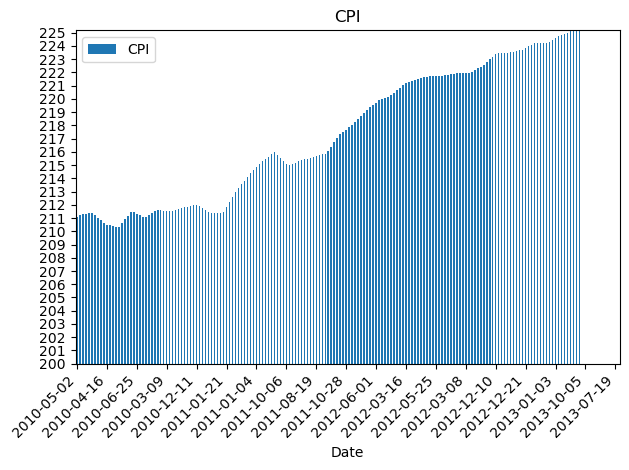

In [72]:
plt.figure(figsize=(10,6), dpi=1000)
df_cpi_unique = df_stats_unique[['Date', 'CPI']].copy()   
df_cpi_unique.dropna()                                          
df_cpi_unique.plot(x='Date', y='CPI', kind='bar')
plt.title('CPI')


n = 10  # Show every 10th label (adjust as needed)
# Get the labels directly from the dataframe
date_labels = df_cpi_unique['Date'].iloc[::n]

formatted_dates = [date.strftime('%Y-%m-%d') for date in df_cpi_unique['Date'].iloc[::n]]

# Get the x tick locations from the index of the date labels
x_ticks = date_labels.index

# Adjust y-axis limits and ticks
y_min = 200
y_max = df_cpi_unique['CPI'].max() #get the max y value to properly scale the axis.
plt.ylim(y_min, y_max)
plt.yticks(range(y_min, int(y_max) + 1, 1)) # Create y-ticks with increments of 1

plt.xticks(ticks=x_ticks, labels=formatted_dates, rotation=45, ha='right')
plt.tight_layout()

plt.savefig("CPI.png", dpi=300)
plt.savefig("CPI.jpg", dpi=300)

plt.show()


<Figure size 10000x6000 with 0 Axes>

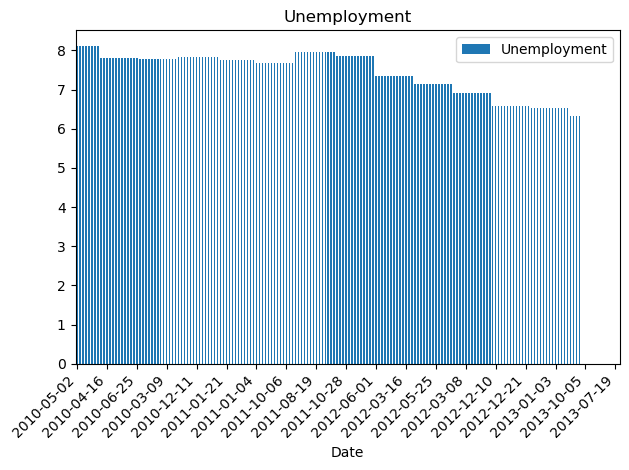

In [73]:

plt.figure(figsize=(10,6), dpi=1000)
df_unem_unique = df_stats_unique[['Date', 'Unemployment']].copy()
df_unem_unique.dropna()
df_unem_unique.plot(x='Date', y='Unemployment', kind='bar')
plt.title('Unemployment')

n = 10  # Show every 10th label (adjust as needed)
# Get the labels directly from the dataframe
date_labels = df_unem_unique['Date'].iloc[::n]

formatted_dates = [date.strftime('%Y-%m-%d') for date in df_unem_unique['Date'].iloc[::n]]

# Get the x tick locations from the index of the date labels
x_ticks = date_labels.index


plt.xticks(ticks=x_ticks, labels=formatted_dates, rotation=45, ha='right')
plt.tight_layout()

plt.savefig("Unemployment.png", dpi=300)
plt.savefig("Unemployment.jpg", dpi=300)

plt.show()
